In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!pip install mpl_finance

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
df = pd.DataFrame({'key1': ['a', 'a', 'b','b','a'], 
                  'key2': ['one', 'two', 'one', 'two', 'one'],
                  'data1': np.random.randn(5), 
                  'data2': np.random.randn(5)})

In [23]:
df

,data1,data2,key1,key2
0,-1.157025,0.001946,a,one
1,-0.054139,0.209573,a,two
2,0.677239,-2.466395,b,one
3,1.088989,-0.510803,b,two
4,-0.751465,0.174112,a,one


In [24]:
df['data1'].groupby(df['key1']).mean()

key1
a   -0.654210
b    0.883114
Name: data1, dtype: float64

In [25]:
df.groupby(['key1', 'key2']).max()

data1     data2
key1 key2                    
a    one  -0.751465  0.174112
     two  -0.054139  0.209573
b    one   0.677239 -2.466395
     two   1.088989 -0.510803

In [26]:
df.groupby(['key1', 'key2']).max().unstack()

data1               data2          
key2       one       two       one       two
key1                                        
a    -0.751465 -0.054139  0.174112  0.209573
b     0.677239  1.088989 -2.466395 -0.510803

In [27]:
for key , group in df.groupby('key1'):
    print(key,group)
    print('-' *50)

a       data1     data2 key1 key2
0 -1.157025  0.001946    a  one
1 -0.054139  0.209573    a  two
4 -0.751465  0.174112    a  one
--------------------------------------------------
b       data1     data2 key1 key2
2  0.677239 -2.466395    b  one
3  1.088989 -0.510803    b  two
--------------------------------------------------


In [28]:
for (key1, key2) , group in df.groupby(['key1', 'key2']):
    print(key1,key2,group)
    print('-' *50)

a one       data1     data2 key1 key2
0 -1.157025  0.001946    a  one
4 -0.751465  0.174112    a  one
--------------------------------------------------
a two       data1     data2 key1 key2
1 -0.054139  0.209573    a  two
--------------------------------------------------
b one       data1     data2 key1 key2
2  0.677239 -2.466395    b  one
--------------------------------------------------
b two       data1     data2 key1 key2
3  1.088989 -0.510803    b  two
--------------------------------------------------


In [29]:
list(df.groupby('key1'))

[('a',       data1     data2 key1 key2
  0 -1.157025  0.001946    a  one
  1 -0.054139  0.209573    a  two
  4 -0.751465  0.174112    a  one), ('b',       data1     data2 key1 key2
  2  0.677239 -2.466395    b  one
  3  1.088989 -0.510803    b  two)]

In [30]:
d=dict(list(df.groupby('key1')))

In [31]:
d['a']

,data1,data2,key1,key2
0,-1.157025,0.001946,a,one
1,-0.054139,0.209573,a,two
4,-0.751465,0.174112,a,one


In [32]:
data_grouped=df.groupby('key1')

In [33]:
data_grouped['data1'].quantile(.9)

key1
a   -0.193604
b    1.047814
Name: data1, dtype: float64

In [34]:
def range_min_max (a):
    return a.max() - a.min()

data_grouped.agg(range_min_max)

,data1,data2
key1,,
a,1.102886,0.207626
b,0.411750,1.955592


In [35]:
def weighted_mean(a):
    weights = np.array([.5,.4,.1])
    b = a * weights[:a.size]
    return b.sum()

In [36]:
df.groupby('key1').agg(weighted_mean)

,data1,data2
key1,,
a,-0.675314,0.102213
b,0.774216,-1.437519


In [37]:
df.groupby('key1', as_index=False).agg(weighted_mean)

,key1,data1,data2
0,a,-0.675314,0.102213
1,b,0.774216,-1.437519


In [38]:
df.groupby(['key1', 'key2'], as_index=False).agg(weighted_mean)

,key1,key2,data1,data2
0,a,one,-0.879098,0.070618
1,a,two,-0.027069,0.104786
2,b,one,0.338620,-1.233198
3,b,two,0.544495,-0.255402


In [39]:
df.groupby(['key1', 'key2'], as_index=False).mean().drop('key1', axis=1)

,key2,data1,data2
0,one,-0.954245,0.088029
1,two,-0.054139,0.209573
2,one,0.677239,-2.466395
3,two,1.088989,-0.510803


# Time series

In [40]:
from datetime import datetime

In [41]:
now= datetime.now()

In [42]:
type(now)

datetime.datetime

In [43]:
now.hour

9

In [44]:
now.day

12

In [45]:
from datetime import timedelta

In [46]:
start = datetime(2019,1,11)

In [47]:
start + timedelta(365)

datetime.datetime(2020, 1, 11, 0, 0)

In [48]:
start.strftime('%m-%Y-%d')

'01-2019-11'

In [49]:
import dateutil

In [50]:
dateutil.parser.parse('11/1/2019', dayfirst=True)

datetime.datetime(2019, 1, 11, 0, 0)

In [51]:
datetime.strptime('Sep 2019/01', '%b %Y/%d')

datetime.datetime(2019, 9, 1, 0, 0)

In [52]:
dates = [datetime(2011,1,2), datetime(2011,1,5), 
       datetime(2011,1,7), datetime(2011,1,8),
       datetime(2011,1,10), datetime(2011,1,12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.192093
2011-01-05    0.389845
2011-01-07   -0.074385
2011-01-08   -0.582296
2011-01-10    0.650560
2011-01-12    0.822325
dtype: float64

In [53]:
ts[::2]

2011-01-02   -0.192093
2011-01-07   -0.074385
2011-01-10    0.650560
dtype: float64

In [54]:
ts + ts[::2]

2011-01-02   -0.384186
2011-01-05         NaN
2011-01-07   -0.148770
2011-01-08         NaN
2011-01-10    1.301120
2011-01-12         NaN
dtype: float64

In [55]:
ts.index[2]

Timestamp('2011-01-07 00:00:00')

In [56]:
ts['1/10/2011']

0.6505600280486645

In [57]:
data= pd.read_csv('krakenEUR.csv', 
                header=None, 
                names=['ts', 'price', 'volume'], 
                index_col='ts')


/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [58]:
data.head()

,price,volume
ts,,
1389173189,624.01000,0.20000
1389173198,624.01000,0.09767
1389173198,623.53836,0.01358
1389173265,623.53836,0.14896
1389173339,623.54066,0.20000


In [59]:
data.describe()

,price,volume
count,2.522749e+07,2.522749e+07
mean,4.603733e+03,4.201418e-01
std,3.477302e+03,1.541445e+00
min,1.481712e+02,0.000000e+00
25%,1.404612e+03,1.288000e-02
50%,3.906900e+03,5.949156e-02
75%,6.889300e+03,2.585900e-01
max,2.000000e+04,4.400000e+02


In [60]:
data.shape

(25227493, 2)

In [61]:
data.index[0]

1389173189

In [62]:
data.index

Int64Index([1389173189, 1389173198, 1389173198, 1389173265, 1389173339,
            1389173528, 1389173534, 1389173545, 1389173545, 1389173668,
            ...
            1547206137, 1547206149, 1547206149, 1547206149, 1547206149,
            1547206149, 1547206149, 1547206149, 1547206156, 1547206159],
           dtype='int64', name='ts', length=25227493)

In [63]:
%matplotlib inline

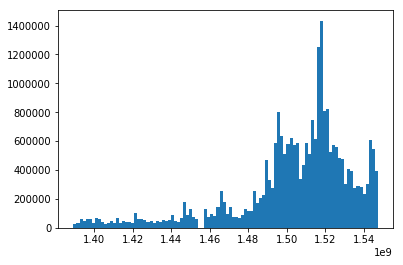

In [64]:
_ = plt.hist(data.index, bins=100)

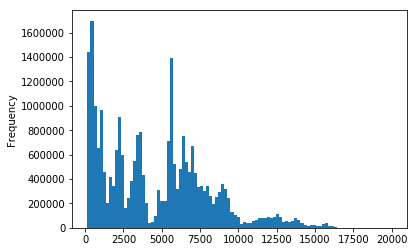

In [65]:
_ = data['price'].plot(kind='hist', bins=100)

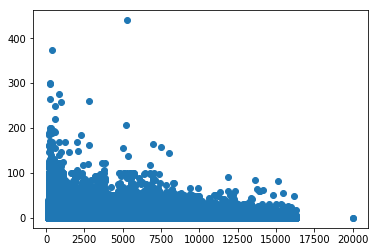

In [66]:
_ = plt.scatter(data['price'], data['volume'])

In [67]:
sa = data.sample(100000)

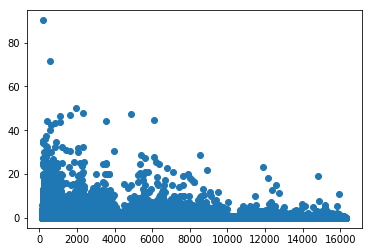

In [68]:
_ = plt.scatter(sa['price'], sa['volume'])

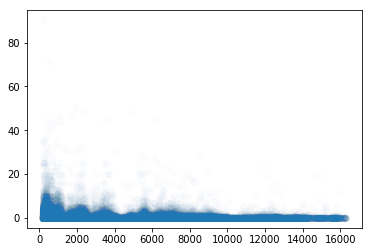

In [69]:
_ = plt.scatter(sa['price'], sa['volume'], alpha=.01)

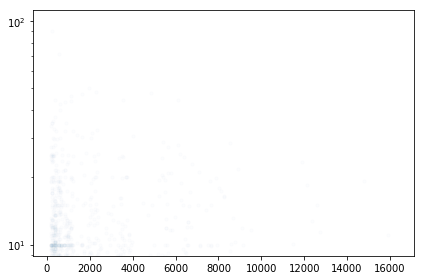

In [70]:
# Hacer el eje y logarítmico
fig, ax = plt.subplots(1,1)
_ = ax.scatter(sa['price'], sa['volume'], alpha=.01, s=10)
plt.yscale('log')
plt.tight_layout()

In [71]:
# Datos del primer índice
data.iloc[0]

price     624.01
volume      0.20
Name: 1389173189, dtype: float64

In [72]:
data.index.max(), data.index.min()

(1547206159, 1389173189)

In [73]:
pd.to_datetime(data.index[0])

Timestamp('1970-01-01 00:00:01.389173189')

In [74]:
pd.to_datetime(data.index[0], unit='s')

Timestamp('2014-01-08 09:26:29')

In [75]:
pd.to_datetime(data.index[-1], unit='s')

Timestamp('2019-01-11 11:29:19')

In [76]:
last_data= data.iloc[-1000000:]

In [93]:
last_data.shape

(1000000, 3)

In [94]:
last_data.index= pd.to_datetime(last_data.index, unit='s')

In [95]:
last_data.head()

,price,volume,hour
ts,,,
2018-12-03 15:33:11,3396.7,1.130000,15
2018-12-03 15:33:11,3396.7,0.981000,15
2018-12-03 15:33:11,3397.0,0.800000,15
2018-12-03 15:33:11,3397.2,0.029000,15
2018-12-03 15:33:11,3397.9,0.131179,15


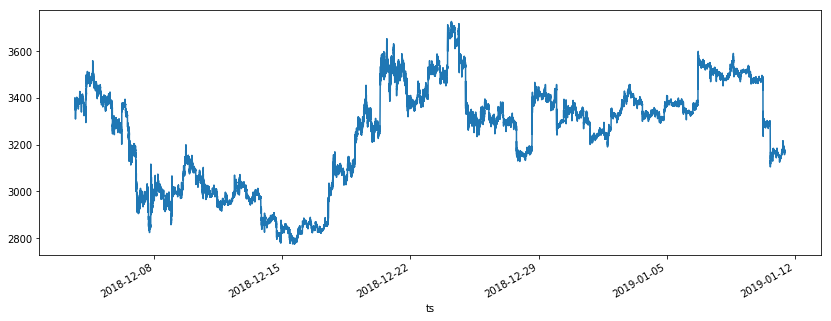

In [96]:
last_data['price'].iloc[-1000000:].plot(figsize=(14,5))

In [97]:
last_data['hour']=last_data.index.hour

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
last_data.head()

,price,volume,hour
ts,,,
2018-12-03 15:33:11,3396.7,1.130000,15
2018-12-03 15:33:11,3396.7,0.981000,15
2018-12-03 15:33:11,3397.0,0.800000,15
2018-12-03 15:33:11,3397.2,0.029000,15
2018-12-03 15:33:11,3397.9,0.131179,15


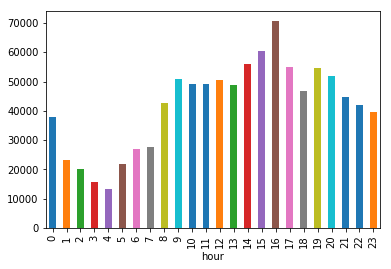

In [99]:
last_data.groupby('hour').count()['price'].plot(kind='bar')

In [100]:
mdata = last_data.resample('1h').agg(
    {'price' : ['first', max, min, 'last'],
    'volume': lambda x: x.sum()})

In [101]:
mdata

price                               volume
                      first     max     min    last     <lambda>
ts                                                              
2018-12-03 15:00:00  3396.7  3400.1  3354.7  3387.8   411.870300
2018-12-03 16:00:00  3387.8  3397.4  3310.2  3375.9   651.082013
2018-12-03 17:00:00  3375.8  3397.2  3362.1  3384.2   432.904973
2018-12-03 18:00:00  3387.7  3403.7  3370.7  3391.0   833.789759
2018-12-03 19:00:00  3389.3  3393.8  3370.0  3373.3   342.018550
2018-12-03 20:00:00  3371.9  3390.0  3353.0  3390.0   359.691724
2018-12-03 21:00:00  3387.0  3421.5  3381.8  3420.1   369.278113
2018-12-03 22:00:00  3420.6  3428.3  3387.7  3394.9   130.852100
2018-12-03 23:00:00  3396.3  3410.9  3376.0  3383.7   173.571187
2018-12-04 00:00:00  3379.3  3412.8  3340.1  3400.0   193.233066
2018-12-04 01:00:00  3398.4  3417.5  3392.1  3402.8   116.919422
2018-12-04 02:00:00  3402.9  3405.0  3377.1  3377.3    37.248196
2018-12-04 03:00:00  3381.3  3383.5  3324.7  3357.9   320.978934
2018-12-04 04:00:00  3358.9  3370.8  3345.4  3354.8    51.061978
2018-12-04 05:00:00  3358.0  3366.9  3319.3  3325.0   236.583502
2018-12-04 06:00:00  3324.4  3500.0  3295.2  3468.0  1039.344227
2018-12-04 07:00:00  3468.0  3499.0  3460.5  3499.0   256.322277
2018-12-04 08:00:00  3499.0  3514.0  3476.0  3483.8   288.036897
2018-12-04 09:00:00  3483.7  3506.4  3482.4  3484.4   315.966207
2018-12-04 10:00:00  3484.4  3510.1  3460.0  3465.1   278.145294
2018-12-04 11:00:00  3465.4  3484.9  3450.3  3479.3   334.688726
2018-12-04 12:00:00  3479.3  3484.8  3463.2  3468.6   170.904668
2018-12-04 13:00:00  3468.6  3494.8  3462.2  3477.8   185.374227
2018-12-04 14:00:00  3477.9  3513.7  3477.7  3511.0   372.038573
2018-12-04 15:00:00  3513.3  3559.9  3492.3  3501.0   515.370802
2018-12-04 16:00:00  3501.6  3507.6  3455.6  3480.6   312.431702
2018-12-04 17:00:00  3478.2  3480.6  3442.0  3453.8   272.519274
2018-12-04 18:00:00  3453.0  3464.0  3431.0  3455.8   344.937683
2018-12-04 19:00:00  3455.8  3470.6  3450.0  3451.2   297.314356
2018-12-04 20:00:00  3452.0  3453.1  3397.4  3412.6   335.339024
...                     ...     ...     ...     ...          ...
2019-01-10 06:00:00  3490.3  3492.3  3236.0  3312.5  1763.783505
2019-01-10 07:00:00  3307.7  3311.3  3281.2  3305.7   628.462078
2019-01-10 08:00:00  3305.7  3308.0  3282.7  3289.9   812.579935
2019-01-10 09:00:00  3289.8  3296.5  3272.5  3284.4   833.166413
2019-01-10 10:00:00  3286.3  3297.9  3284.4  3286.5   455.819841
2019-01-10 11:00:00  3287.6  3297.2  3281.9  3296.6   294.895931
2019-01-10 12:00:00  3296.6  3303.7  3282.7  3291.6   396.653934
2019-01-10 13:00:00  3288.3  3298.0  3269.7  3289.1   531.839501
2019-01-10 14:00:00  3286.9  3298.0  3279.5  3295.6   419.800737
2019-01-10 15:00:00  3295.6  3302.8  3291.0  3294.2   290.104254
2019-01-10 16:00:00  3294.2  3295.4  3105.2  3159.2  1838.204243
2019-01-10 17:00:00  3159.2  3162.7  3142.0  3152.5   531.434191
2019-01-10 18:00:00  3152.5  3152.9  3139.8  3149.2   363.584935
2019-01-10 19:00:00  3149.2  3181.7  3130.0  3176.0   545.468346
2019-01-10 20:00:00  3176.0  3185.0  3166.7  3168.9   278.543983
2019-01-10 21:00:00  3168.9  3173.0  3163.8  3171.9    82.638754
2019-01-10 22:00:00  3171.9  3172.3  3160.6  3169.1   118.813728
2019-01-10 23:00:00  3166.8  3172.2  3162.7  3162.7    48.318162
2019-01-11 00:00:00  3162.7  3185.5  3144.1  3173.5   242.704102
2019-01-11 01:00:00  3176.0  3177.5  3160.4  3162.4    67.613129
2019-01-11 02:00:00  3162.4  3166.5  3150.3  3151.7    97.267302
2019-01-11 03:00:00  3151.1  3155.7  3149.7  3154.0   106.366101
2019-01-11 04:00:00  3153.8  3153.8  3125.6  3138.7    95.813542
2019-01-11 05:00:00  3138.7  3154.0  3138.6  3152.6    90.830170
2019-01-11 06:00:00  3149.5  3163.2  3148.2  3161.1   149.917815
2019-01-11 07:00:00  3161.1  3178.2  3157.6  3174.3   326.359000
2019-01-11 08:00:00  3174.3  3217.6  3174.3  3183.0   498.701336
2019-01-11 09:00:00  3183.1  3199.3  3180.0  3183.4   455

In [102]:
mdata.columns= mdata.columns.droplevel(0)
mdata.head()

,first,max,min,last,<lambda>
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


In [103]:
mdata.rename(columns={'first': 'open', 'max': 'high', 'min': 'low', 'last': 'close', '<lambda>':'volume'}, inplace=True)

In [104]:
mdata.head()

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


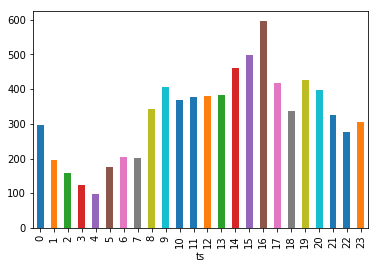

In [105]:
# Calcular el volumen medio de cada hora
mdata.groupby(mdata.index.hour).mean()['volume'].plot(kind = 'bar')

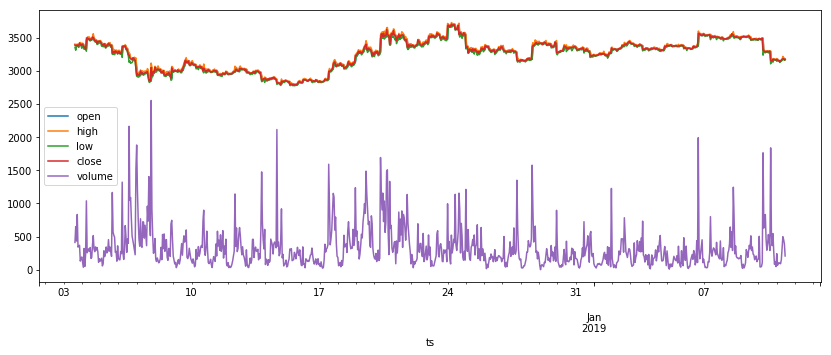

In [106]:
mdata.plot(figsize=(14,5))

In [107]:
mdata.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [108]:
from mpl_finance import candlestick2_ohlc

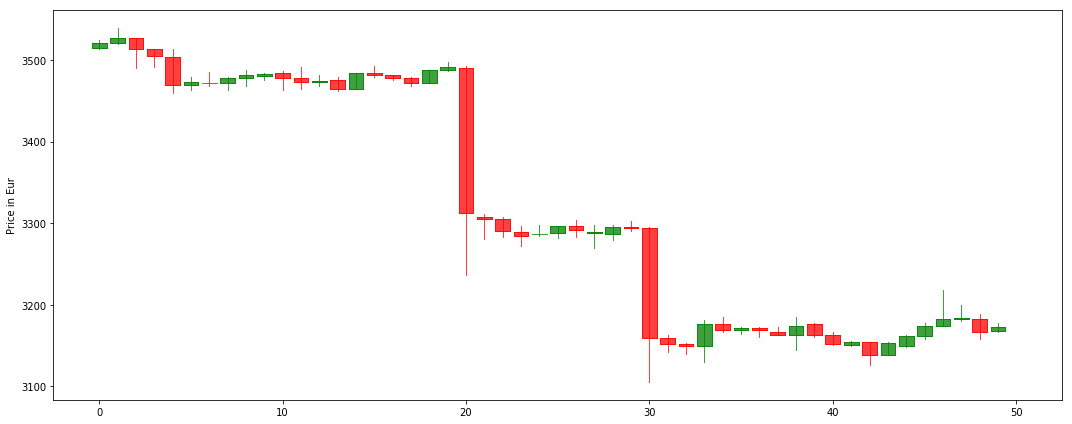

In [109]:
aux= mdata[-50:]
fig, ax= plt.subplots(1,1,figsize=(15,6))
candlestick2_ohlc(ax,aux['open'], aux['high'], aux['low'], aux['close'], colorup='g', width=.8)
ax.set_ylabel('Price in Eur')
plt.tight_layout()

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

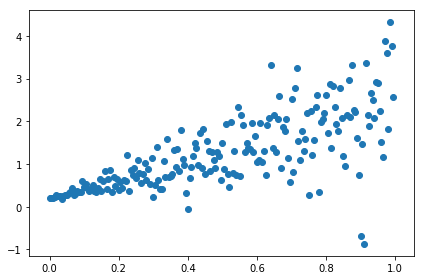

In [111]:
# Media móvil
X = np.arange(0,1,0.005)
y = 2 * X + np.random.normal(.2, X) # media de 2 y desviación de X

fig, ax = plt.subplots(1,1)
ax.scatter(X,y)
plt.tight_layout()

In [112]:
df = pd.DataFrame({'y': y})

In [113]:
df['moving_avg'] = df.rolling(window = 10).mean()

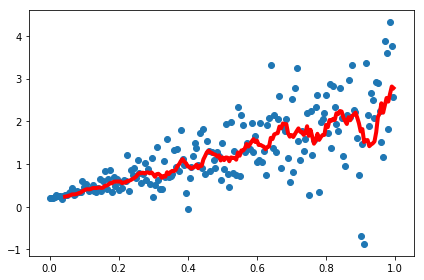

In [114]:
fig, ax = plt.subplots(1,1)
ax.scatter(X,y)
ax.plot(X, df['moving_avg'], c='r', lw=4)
plt.tight_layout()

In [115]:
for i in [3,5,10,20,50,100]:
    df['moving_avg_{}'.format(i)] = df['y'].rolling(window = i).mean()

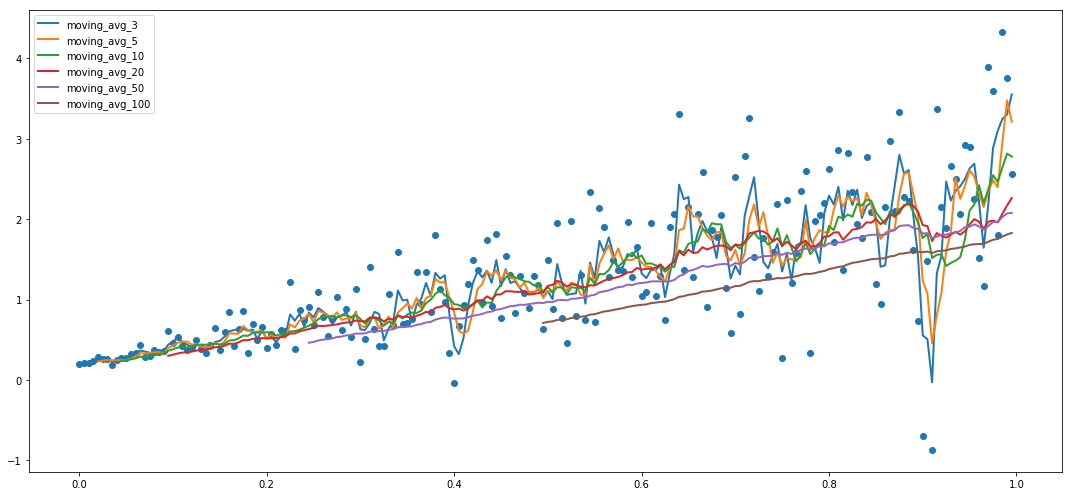

In [116]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
ax.scatter(X,y)
for col in df.columns:
    if col.startswith('moving_avg_'):
        ax.plot(X, df[col], lw=2, label=col)
plt.legend()
plt.tight_layout()

In [ ]:
for i in [3,5,10,20,50,100]:
    df['moving_avg_{}'.format(i)] = df['y'].rolling(window = i).mean()

In [124]:
for window in (1,3,4,10,30,60,120,180,240,300,480,600):
    mdata['ma{}'.format(window)] = mdata['close'].rolling(window).mean()

In [128]:
mdata.tail()

,open,high,low,close,volume,ma1,ma3,ma4,ma10,ma30,ma60,ma120,ma180,ma240,ma300,ma480,ma600
ts,,,,,,,,,,,,,,,,,
2019-01-11 07:00:00,3455.890411,3178.2,3157.6,3174.3,326.359000,3174.3,3162.666667,3156.675,3160.01,3248.436667,3372.576667,3433.575000,3406.033889,3389.719583,3373.993333,3380.044583,3362.227333
2019-01-11 08:00:00,3457.128911,3217.6,3174.3,3183.0,498.701336,3183.0,3172.800000,3167.750,3161.40,3238.600000,3367.231667,3432.330000,3405.154444,3389.393750,3373.321000,3379.622708,3362.752833
2019-01-11 09:00:00,3458.324685,3199.3,3180.0,3183.4,455.695288,3183.4,3180.233333,3175.450,3163.47,3228.996667,3361.878333,3431.069167,3404.291667,3389.132500,3372.483000,3379.031667,3363.290833
2019-01-11 10:00:00,3459.473723,3188.5,3157.6,3166.5,392.112061,3166.5,3177.633333,3176.800,3162.77,3218.270000,3356.188333,3429.447500,3403.323889,3388.735833,3371.624667,3378.432917,3363.789667
2019-01-11 11:00:00,3460.571879,3178.1,3166.5,3172.9,207.689381,3172.9,3174.266667,3176.450,3163.82,3207.656667,3350.810000,3427.805000,3402.442222,3388.414167,3371.273333,3377.901458,3364.294500


In [129]:
ma_cols = [x for x in mdata.columns if x.startswith('ma')]

In [130]:
ma_cols

['ma1',
 'ma3',
 'ma4',
 'ma10',
 'ma30',
 'ma60',
 'ma120',
 'ma180',
 'ma240',
 'ma300',
 'ma480',
 'ma600']

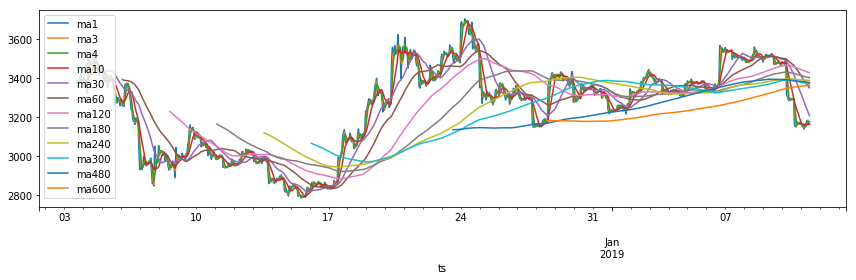

In [132]:
fig, ax = plt.subplots(figsize=(12,4))
for col in ma_cols:
    mdata[col].plot(ax=ax, label=col)
plt.legend()
plt.tight_layout()

In [135]:
# Saber puntos de compra
serie_a = mdata['ma1'] >= mdata['ma10']
serie_b = mdata['ma1'] < mdata['ma10']

In [137]:
df = pd.DataFrame({'b':serie_b, 'nb': serie_b.shift(-1)}, index = serie_b.index) # shift para desplazar la columna 1 para arriba. Así saber dónde hay un cambio de True a False o de False a True.

In [138]:
df

,b,nb
ts,,
2018-12-03 15:00:00,False,False
2018-12-03 16:00:00,False,False
2018-12-03 17:00:00,False,False
2018-12-03 18:00:00,False,False
2018-12-03 19:00:00,False,False
2018-12-03 20:00:00,False,False
2018-12-03 21:00:00,False,False
2018-12-03 22:00:00,False,False
2018-12-03 23:00:00,False,False


In [150]:
df['b'] == df['nb']

ts
2018-12-03 15:00:00     True
2018-12-03 16:00:00     True
2018-12-03 17:00:00     True
2018-12-03 18:00:00     True
2018-12-03 19:00:00     True
2018-12-03 20:00:00     True
2018-12-03 21:00:00     True
2018-12-03 22:00:00     True
2018-12-03 23:00:00     True
2018-12-04 00:00:00     True
2018-12-04 01:00:00    False
2018-12-04 02:00:00     True
2018-12-04 03:00:00     True
2018-12-04 04:00:00     True
2018-12-04 05:00:00    False
2018-12-04 06:00:00     True
2018-12-04 07:00:00     True
2018-12-04 08:00:00     True
2018-12-04 09:00:00     True
2018-12-04 10:00:00     True
2018-12-04 11:00:00     True
2018-12-04 12:00:00     True
2018-12-04 13:00:00     True
2018-12-04 14:00:00     True
2018-12-04 15:00:00    False
2018-12-04 16:00:00     True
2018-12-04 17:00:00     True
2018-12-04 18:00:00     True
2018-12-04 19:00:00     True
2018-12-04 20:00:00     True
                       ...  
2019-01-10 06:00:00     True
2019-01-10 07:00:00     True
2019-01-10 08:00:00     True
2019-01-10 

In [161]:
# Corregido clase: puntos de compra
buy = df.apply(lambda x: not x[0] and x[1], axis=1)
buy_points= buy[buy== True]

sell= df.apply(lambda x: x[0] and not x[1], axis=1)
sell_points = sell[sell== True]

In [164]:
buy_points

ts
2018-12-04 01:00:00    True
2018-12-04 15:00:00    True
2018-12-05 13:00:00    True
2018-12-06 01:00:00    True
2018-12-06 11:00:00    True
2018-12-07 14:00:00    True
2018-12-07 19:00:00    True
2018-12-08 05:00:00    True
2018-12-08 07:00:00    True
2018-12-08 18:00:00    True
2018-12-09 06:00:00    True
2018-12-09 08:00:00    True
2018-12-09 20:00:00    True
2018-12-10 22:00:00    True
2018-12-11 06:00:00    True
2018-12-11 08:00:00    True
2018-12-11 23:00:00    True
2018-12-12 21:00:00    True
2018-12-12 23:00:00    True
2018-12-13 10:00:00    True
2018-12-13 16:00:00    True
2018-12-14 12:00:00    True
2018-12-14 22:00:00    True
2018-12-15 05:00:00    True
2018-12-16 07:00:00    True
2018-12-16 13:00:00    True
2018-12-16 20:00:00    True
2018-12-17 00:00:00    True
2018-12-18 00:00:00    True
2018-12-18 04:00:00    True
                       ... 
2018-12-25 12:00:00    True
2018-12-26 05:00:00    True
2018-12-27 00:00:00    True
2018-12-27 14:00:00    True
2018-12-28 05:00:

# PREDECIR DÓNDE SALIR DE FIESTA SEGÚN LAS LLAMADAS A LA POLI

In [175]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [176]:
! ls 

311_Service_Requests_from_2010_to_Present.csv
CV - Marta Mas Rigo.pages
CV - Marta Mas Rigo.pdf
clases_enero_master_DS.ipynb
events.csv
img26.jpg
krakenEUR.csv
sentiment_analysis.py


In [181]:
req_df= pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header = 0, sep=',', parse_dates = ['Created Date', 'Closed Date'], dayfirst = True, index_col = 'Created Date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [184]:
req_df.sample()

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2015-01-07 22:41:00,30985479,2015-02-07 05:41:10,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10304.0,33 HARRISON STREET,HARRISON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.624133,-74.075761,"(40.62413316099506, -74.07576108715043)"


In [185]:
req_df.shape

(364558, 52)

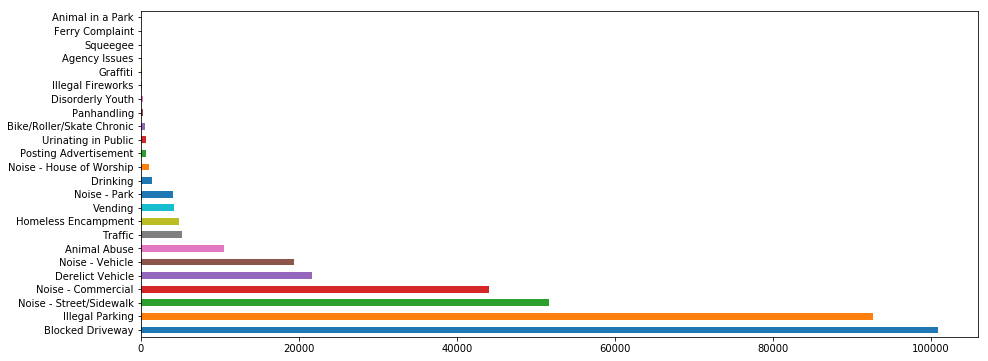

In [193]:
req_df['Complaint Type'].value_counts().plot(kind='barh', figsize=(15,6)) # figsize = cuánto quiero de ancho y cuánto de alto

In [190]:
req_df[['Complaint Type', 'Borough']].head()

,Complaint Type,Borough
Created Date,,
2015-12-31 23:59:45,Noise - Street/Sidewalk,MANHATTAN
2015-12-31 23:59:44,Blocked Driveway,QUEENS
2015-12-31 23:59:29,Blocked Driveway,BRONX
2015-12-31 23:57:46,Illegal Parking,BRONX
2015-12-31 23:56:58,Illegal Parking,QUEENS


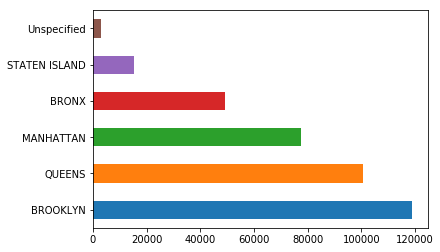

In [194]:
req_df['Borough'].value_counts().plot(kind='barh')

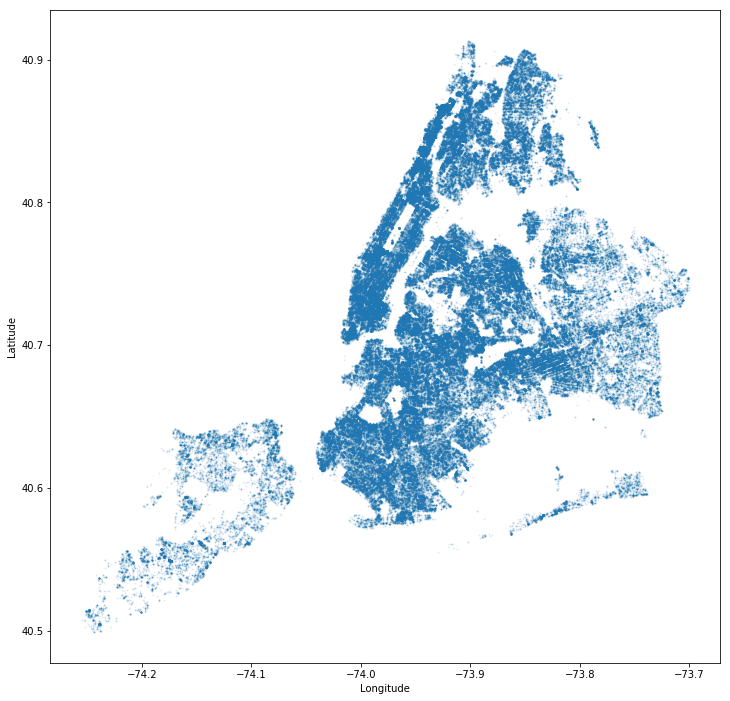

In [201]:
# Localizar las quejas

req_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.1,figsize=(12,12), s=1)

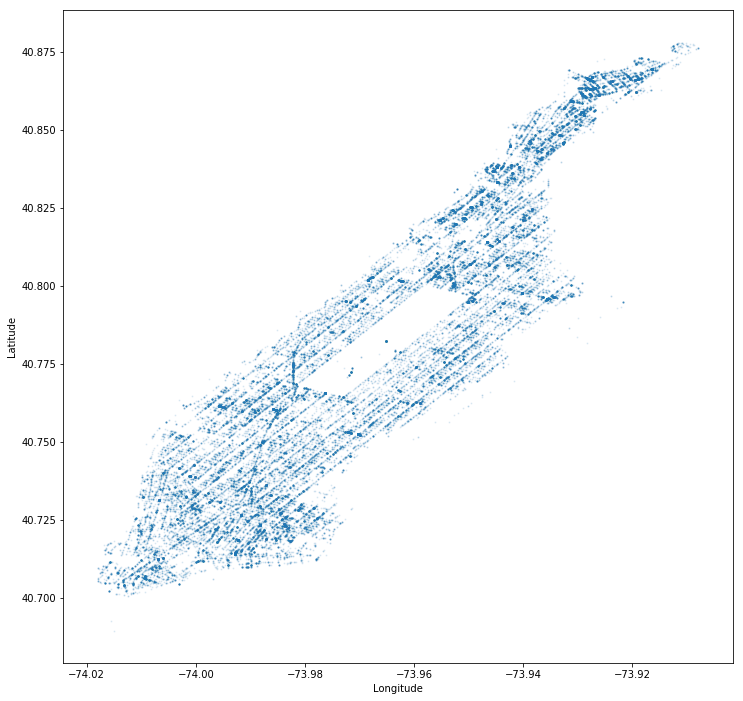

In [213]:
# Localizar las quejas según el barrio

req_df[req_df['Borough']== 'MANHATTAN'].plot(kind='scatter',
                                             x='Longitude', y='Latitude', 
                                             alpha=0.1,figsize=(12,12), s=1)

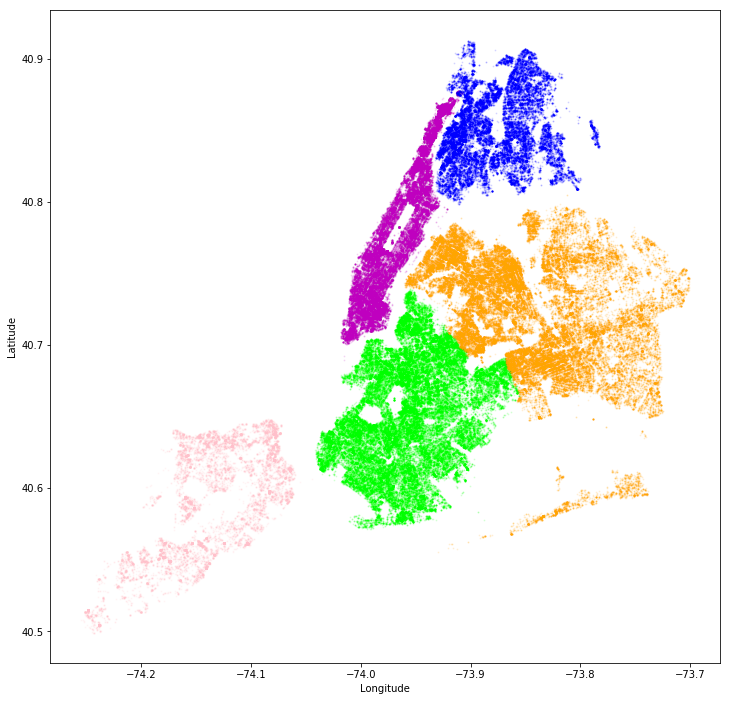

In [212]:
# Localizar las quejas según el barrio
colors= ('lime', 'orange', 'm', 'b', 'pink', 'peru')
fix, ax = plt.subplots(1,1, figsize=(12,12))
for color, barrio in zip(colors, req_df['Borough'].value_counts().index):
    req_df[req_df['Borough']== barrio].plot(kind='scatter',
                                            ax=ax, c=color, x='Longitude', y='Latitude',
                                            alpha=0.1,figsize=(12,12), s=1)

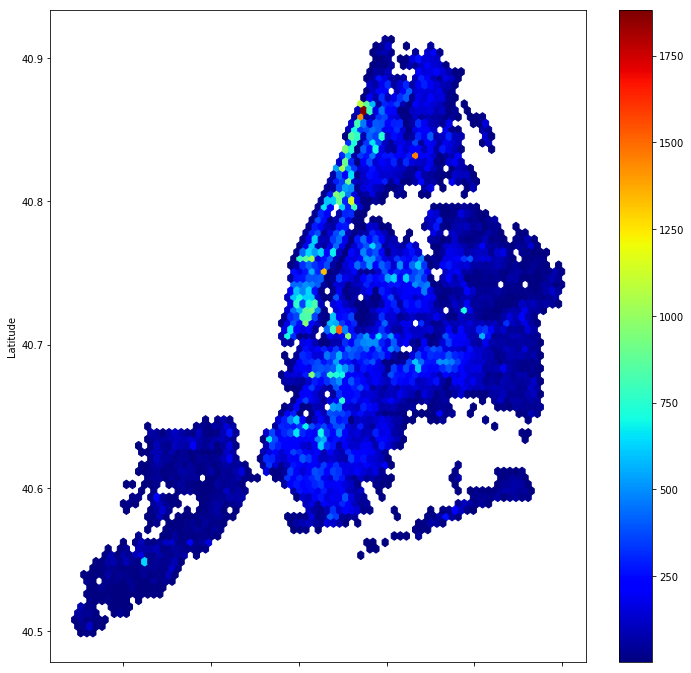

In [219]:
# Dónde hay más llamadas
req_df.plot(kind = 'hexbin', x='Longitude', y='Latitude',
            gridsize=80, figsize=(12,12), colormap='jet', mincnt=1)

In [221]:
# Dónde están las quejas de ruido
req_noise_df = req_df[req_df['Complaint Type'].str.contains('noise', case = False)]

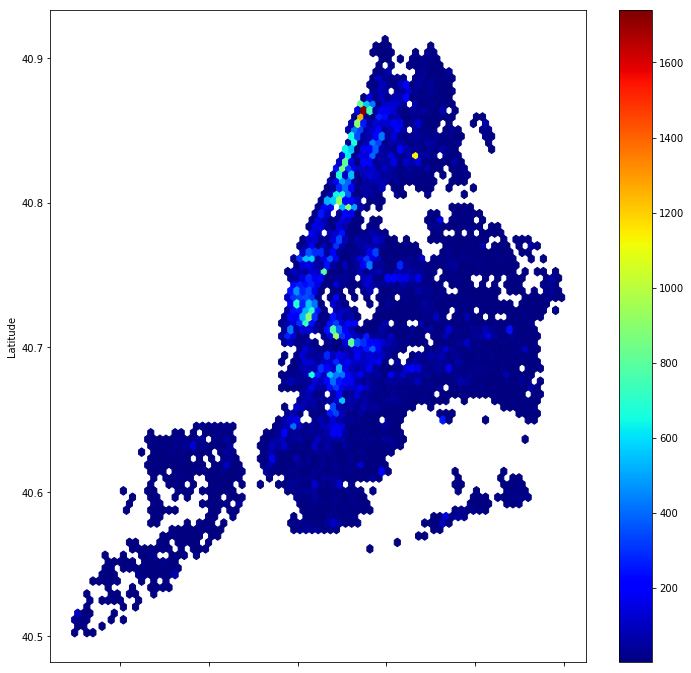

In [222]:
req_noise_df.plot(kind = 'hexbin', x='Longitude', y='Latitude',
            gridsize=80, figsize=(12,12), colormap='jet', mincnt=1)

In [225]:
req_df['Descriptor'].value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


In [230]:
req_df[req_df['Complaint Type'] == 'Drinking']['Descriptor'].value_counts()

In Public                     971
Underage - Licensed Est       345
After Hours - Licensed Est     93
Name: Descriptor, dtype: int64

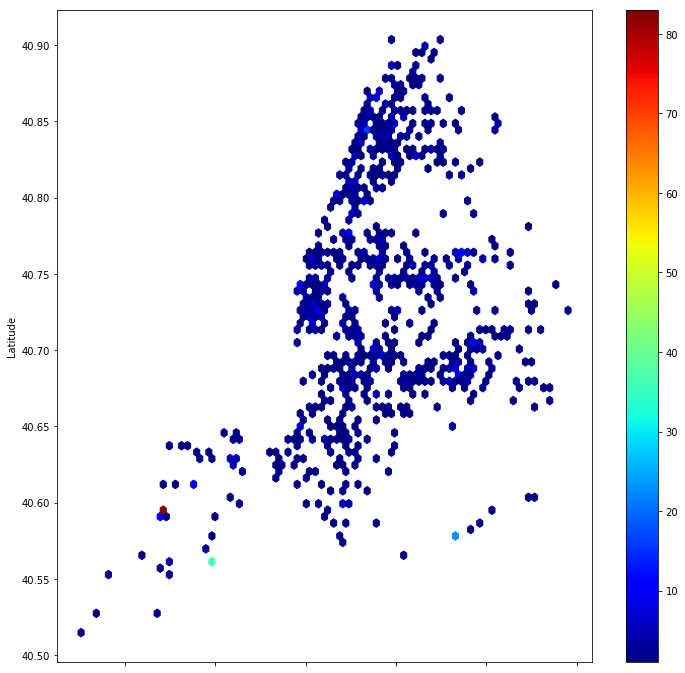

In [228]:
req_df[req_df['Complaint Type'] == 'Drinking'].plot(kind = 'hexbin', x='Longitude', y='Latitude',
            gridsize=80, figsize=(12,12), colormap='jet', mincnt=1)

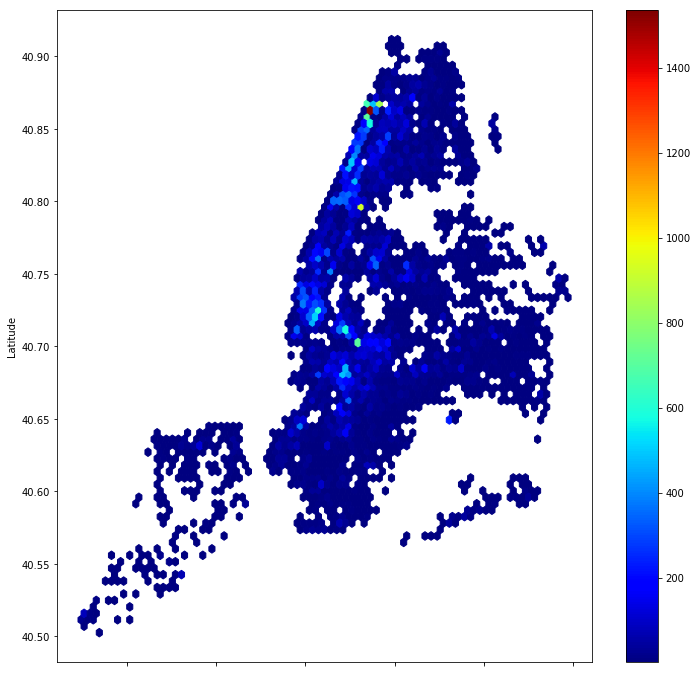

In [232]:
# Fiesta y música alta
req_df[req_df['Descriptor'] == 'Loud Music/Party'].plot(kind = 'hexbin', x='Longitude', y='Latitude',
            gridsize=80, figsize=(12,12), colormap='jet', mincnt=1)

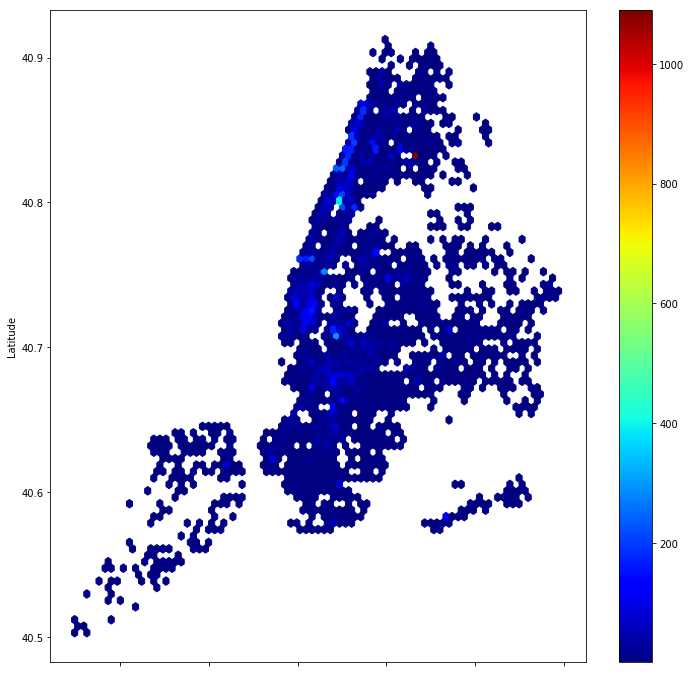

In [233]:
req_df[req_df['Descriptor'] == 'Loud Talking'].plot(kind = 'hexbin', x='Longitude', y='Latitude',
            gridsize=80, figsize=(12,12), colormap='jet', mincnt=1)

In [235]:
req_party_df = req_df[(req_df['Descriptor']== 'Loud Music/Party') | 
      (req_df['Descriptor']== 'After Hours - Licensed Est')]

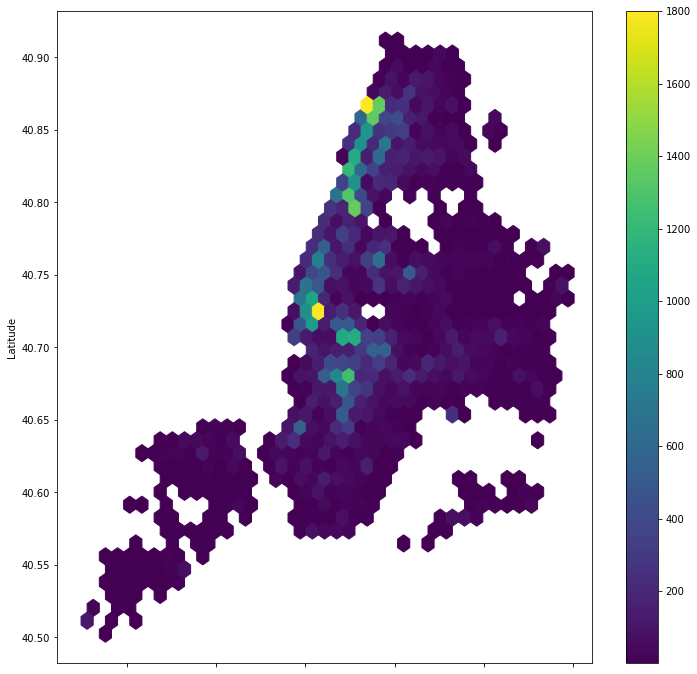

In [240]:
req_party_df.plot(kind = 'hexbin', x='Longitude', y='Latitude',
            gridsize=40, figsize=(12,12), colormap='viridis', mincnt=1)